In [8]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import colors
import scikitplot as skplt

In [10]:
# loading the dataset to a pandas DataFrame
customer_dataset = pd.read_csv('customer.csv')

In [11]:
customer_dataset.shape

(10372, 7)

In [12]:
# print the first 5 rows of the dataframe
customer_dataset.head()

,conversion_id,session_id,timestamp,channel_label,holder_engagement,closer_engagement,conversion
0,1be2b93a-6b36-4481-bed1-a7b0766847f0,2021-06-06_0001__aaf3b324-758d-d819-a2ee-4e51e...,2021-06-06 11:22:08,direct,0,1,0
1,1be2b93a-6b36-4481-bed1-a7b0766847f0,2021-07-13_0001__aaf3b324-758d-d819-a2ee-4e51e...,2021-07-13 15:01:29,crm,1,0,0
2,1be2b93a-6b36-4481-bed1-a7b0766847f0,2021-07-19_0001__2594bffe-76af-4b40-b0f7-12a8f...,2021-07-19 08:10:11,crm,1,1,1
3,52c8c88f-cf76-4b3c-bb02-d06b6215db29,2021-05-21_0001__7084ac0f-3021-e583-2432-a8a53...,2021-05-21 07:30:14,direct,0,1,0
4,52c8c88f-cf76-4b3c-bb02-d06b6215db29,2021-05-27_0001__7084ac0f-3021-e583-2432-a8a53...,2021-05-27 14:07:46,organic search (non-brand),1,0,0


In [13]:
customer_dataset.isnull().sum()

conversion_id        0
session_id           0
timestamp            0
channel_label        0
holder_engagement    0
closer_engagement    0
conversion           0
dtype: int64

In [14]:
# statistical measures about the data
customer_dataset.describe()

,holder_engagement,closer_engagement,conversion
count,10372.000000,10372.000000,10372.000000
mean,0.575010,0.268608,0.208639
std,0.494365,0.443257,0.406355
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [15]:
# separating the data & label
X = customer_dataset.drop(columns = ['conversion_id','session_id','timestamp','channel_label','conversion'],axis=1)
Y = customer_dataset['conversion']

In [16]:
X

,holder_engagement,closer_engagement
0,0,1
1,1,0
2,1,1
3,0,1
4,1,0
...,...,...
10367,1,1
10368,1,0
10369,1,0
10370,0,1


In [17]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
10367    1
10368    0
10369    0
10370    1
10371    1
Name: conversion, Length: 10372, dtype: int64

In [18]:
#Splitting the data into training data & Testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train, Y_train)

LogisticRegression()

In [21]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [22]:
print(X_train_prediction)

[0 0 0 ... 0 1 0]


In [23]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9396167289381704


In [24]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [25]:
print(X_test_prediction)

[1 0 0 ... 1 0 0]


In [26]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.9416867469879519


In [27]:
confusion_matrix(Y_test,X_test_prediction)

array([[1502,  121],
       [   0,  452]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


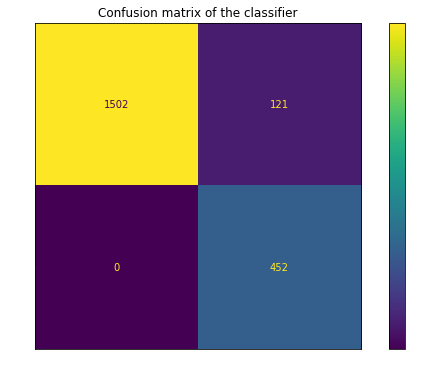

In [28]:

matrix = plot_confusion_matrix(model, X_test, Y_test)
plt.title('Confusion matrix of the classifier')
plt.xlabel('predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()

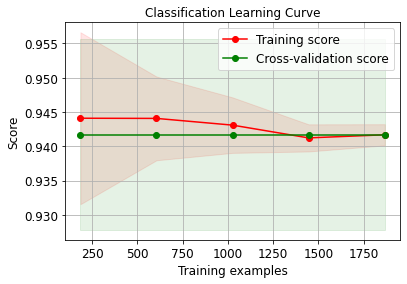

In [33]:
skplt.estimators.plot_learning_curve(model, X_test, Y_test,
                                     cv=10, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

In this task i used Logistic Regression model for building the classifier. 
I show training and test accuracy.
Also show the confusion matrix for better visualization.
Finally i depict the classification learning curve.